c:\python27\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


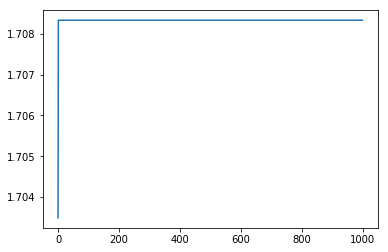

In [1]:
import numpy as np
from sklearn import datasets
from sklearn.cross_validation import train_test_split
import matplotlib.pyplot as plt

data = datasets.load_iris()
X = data.data
Y = data.target



class LinearModule():
    def __init__(self, dimension):
        self.dimension = dimension
        self.theta = np.random.rand(dimension)
        self.cost=[]
        self.accuracy=[]
       
    def randomize(self,variance):
        self.theta=(self.theta*2*variance)-variance
        
    def init_gradient(self):
        self.gradient=np.zeros((1,self.X))
        
    def update_theta(self,X,Y,idx,step):
        tmp_theta = np.copy(self.theta)
        for k in range(self.dimension):
            tmp_theta[k] = self.theta[k] - step*2*X[idx][k]*(X[idx][k]*self.theta[k] - Y[idx])/self.dimension + np.sign(self.theta[k])*coeff
            #print(step*2*(X[idx][k]-Y[idx])*(X[idx][k]-self.theta[k]*Y[idx]))
            #tmp_theta[k] = self.theta[k] - step*2*(X[idx][k]-Y[idx])*(X[idx][k]-self.theta[k]*Y[idx])
            #print('tmp_theta['+str(k)+'] : ' + str(tmp_theta[k]))
            #if tmp_theta[k] < 0:
            #    tmp_theta[k] -= coeff
            #else :
            #    tmp_theta[k] += coeff
            #self.theta[k] = tmp_theta[k]
        #print(self.theta)
        #print(tmp_theta)
        return tmp_theta
    
    def predict(self, X):
        return np.dot(X,self.theta)
        
    def fit2(self,X,Y,max_iter,step):
        for it in range(max_iter):
            tmp_cost=0
            y_predit = []
            for i in range(len(X)):
                idx = np.random.randint(0,len(X)-1)
                tmp_theta = self.update_theta(X,Y,idx,step)
                for j in range(self.dimension):
                    if (tmp_theta[j]*self.theta[j])<0:
                        self.theta[j]=0
                    else:   
                        self.theta[j]=tmp_theta[j]
                #tmp_cost+=(Y[i]-np.dot(X[i],self.theta))*(Y[i]-np.dot(X[i],self.theta))              
                tmp_cost+=(Y[i]-self.predict(X[i]))**2

            #print(y_predit)
            #print(len(Y))
            #print(len(y_predit))
            #tmp_cost = np.sum(Y,y_predit)
            self.cost.append(tmp_cost/len(X)) #+ coeff*np.sum(np.absolute(self.theta)))
            
            
    def fit(self,X,Y,max_iter,step):
        for it in range(max_iter):
            tmp_cost=0
            y_predit = []
            for i in range(len(X)):
                idx = np.random.randint(0,len(X)-1)
                tmp_theta = self.update_theta(X,Y,idx,step)
                self.gradient =  -2 * (Y[i] - np.dot(self.theta,X[i])) * X[i]  + coeff * np.sign(self.theta)
                tmp_theta = np.copy(self.theta)
                self.theta -= step*self.gradient
                #print(self.theta)
                for j in range(self.dimension):
                    if (tmp_theta[j]*self.theta[j])<0:
                        self.theta[j]=0
                    else:   
                        self.theta[j]=tmp_theta[j]
                #tmp_cost+=(Y[i]-np.dot(X[i],self.theta))*(Y[i]-np.dot(X[i],self.theta))              
                tmp_cost+=(Y[i]-self.predict(X[i]))**2

            #print(y_predit)
            #print(len(Y))
            #print(len(y_predit))
            #tmp_cost = np.sum(Y,y_predit)
            self.cost.append(tmp_cost/len(X)) #+ coeff*np.sum(np.absolute(self.theta)))
   
        
        

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2)
max_iter = 1000
coeff = 0
step = 0.1

model = LinearModule(4)
model.randomize(0.1)

model.fit(X_train,Y_train,max_iter,step)

plt.plot(range(max_iter),model.cost)
plt.show()


In [8]:
print(model.cost)

[25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397, 25519.789610453397,